## [89. Gray Code](https://leetcode.com/problems/gray-code/description/)

问题难度: &clubs; &clubs; &clubs;

### 问题描述

`gray code`是一个二进制的数字系统, 其中两个连续的值只有一位不一样.

给定一个非负的整数`n`标识编码中的总位数, 打印出`gray code`的序列. `gray code`序列必须从`0`开始.

**示例1**
```
Input: 2
Output: [0,1,3,2]
Explanation:
00 - 0
01 - 1
11 - 3
10 - 2

对于一个给定的 n, gray code 序列可能并不是唯一的.
例如, [0,2,3,1] 也是一个有效的gray code序列.

00 - 0
10 - 2
11 - 3
01 - 1
```

**示例2**
```
Input: 0
Output: [0]
解释: 我们将 gray code 序列定义为从0开始. 一个n的gray code 序列长度为2^n, 那么对于 n = 0, 其大小为 2^0 = 1.因此, 对于 n = 0, gray code序列为: [0].
```

### 解题思路

从示例中, 我们可以知道: 对于`n`应该要有`2^n`个元素. 找找规律:


参考[维基百科](https://zh.wikipedia.org/wiki/%E6%A0%BC%E9%9B%B7%E7%A0%81)中得到以下几种方法:

**直接排列法**:

> 以二进制为0值的格雷码为第零项，第一项改变最右边的位元，第二项改变右起第一个为1的位元的左边位元，第三、四项方法同第一、二项，如此反复，即可排列出n个位元的格雷码。

尝试理解一下:
当`n=3`时, `gray code`序列为:
```
000 - 0 
001 - 1
011 - 3 
010 - 2
110 - 6
111 - 7
101 - 5
100 - 4
```

**镜面对称法**

> n位元的格雷码可以从n-1位元的格雷码以上下镜射后加上新位元的方式快速得到，如下图所示:
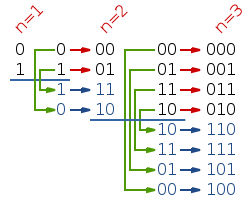

**二进制数转格雷码**

根据定义, 得到公式:

`G(n) = B(n) Xor B(n+1)` 即: `G(n) = B(n) + B(n+1)`

其中`n`表示第`n`位, `B(n)`表示二进制的第`n`位, `G(n)`表示格雷码的第`n`位.

In [1]:
class Solution(object):
    # gray to binary
    def grayCode(self, n):
        """
        :type n: int
        :rtype: List[int]
        """
        if n == 0:
            return [0]
        ans = list()
        total_iter = 1
        for i in range(n-1):
            total_iter *= 2 
        iter = 0
        code_arr = [0 for _ in range(n)]
        while iter < total_iter:
            ans.append(self.convert(code_arr))
            code_arr[-1] = 1 - code_arr[-1]
            ans.append(self.convert(code_arr))
            end = n - 1
            while end > 0 and code_arr[end] == 0:
                end -= 1
            if end >= 1:
                code_arr[end-1] = 1 - code_arr[end-1]
            iter += 1
        return ans
        
    def convert(self, arr):
        num = 0
        now_num = 1
        for i in range(len(arr)-1 , -1, -1):
            num += arr[i] * now_num
            now_num *= 2
        return num
    
    def grayCodeMirror(self, n):
        """
        :type n: int
        :rtype: List[int]
        """
        if n == 0:
            return [0]
        if n == 1:
            return [0, 1]
        arr = self.grayCodeMirror(n-1)
        ans = [0 for i in range(2*len(arr))]
        pow_val = 1
        for _ in range(n-1):
            pow_val *= 2
        for i in range(len(arr)):
            ans[i] = arr[i]
            ans[len(arr) + i] = arr[len(arr)-i-1] + pow_val
        return ans

In [22]:
n = 2
s = Solution()
print s.grayCodeMirror(n)

[0, 1, 3, 2]


## [90-Subsets II](https://leetcode.com/problems/subsets-ii/description/)

问题难度: &clubs; &clubs; &clubs;

### 问题描述

给定一个可能包含重复数字的整数集合`nums`, 返回所有可能的子集(幂集).

**注意**: 返回集合中不能包含重复的子集.

**示例**
```
Input: [1,2,2]
Output:
[
  [2],
  [1],
  [1,2,2],
  [2,2],
  [1,2],
  []
]
```

### 解题思路

这个题目与之前的[78-Subsets](https://leetcode.com/problems/subsets/description/)类似, 唯一不同在于: 这道题目中数组有可能包含重复的数字, 其实按照之前拿到题目的解法, 将数组存储在`dict`中, 还是能解决这个问题的.

可以根据数组长度进行划分, 以`[1,2,2]`为例:
- 长度为`0`: `[]`
- 长度为`1`: `[1], [2]`
- 长度为`2`: `[1,2], [2,2]`
- 长度为`3`: `[1,2,2]`

由于数组中可能包含重复的数字, 那么我们需要先对列表排个序. 

总的说来, 还是一个递归法, 例如, 针对长度为`2`时, 需要依赖长度为`1`的数据:
- 对于`[1]`, 从它的下一位开始, 加入到`[1]`后面: `[1,2]`
- 对于`[2]`, 发现它是一个重复的字符, 那么就需要判断是否加入重复字符:
    - 如果当前列表中`2`的出现次数已经到了`2`的总数, 那么就不加了
    - 否则, 需要加, 此时: 新增`[2,2]`

因此, 需要预先存储两个字典, 分别存储`num`对应的最后一位位置以及`num`出现的次数, 用来决定是否添加重复字符以及从哪个列表开始添加.

### 代码

In [5]:
class Solution(object):
    def subsetsWithDup(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        total_ans = list()
        if len(nums) == 0:
            return total_ans
        ans = list()
        n = len(nums)
        nums.sort()
        pos_dict = dict()
        dup_dict = dict()
        for i in range(len(nums)):
            if nums[i] in pos_dict:
                num = 1
                if nums[i] in dup_dict:
                    num += dup_dict[nums[i]]
                else:
                    num += 1
                dup_dict[nums[i]] = num
            pos_dict[nums[i]] = i
        for k in range(n + 1):
            ans = self.combineArr(nums, n, k, pos_dict, dup_dict, ans)
            total_ans += ans
        return total_ans

    def combineArr(self, nums, n, k, pos_dict, dup_dict, ans):
        new_list = list()
        if k == 0:
            return [[]]
        if k == 1:
            return [[key] for key in pos_dict]
        for i in range(len(ans)):
            arr = ans[i]
            if arr[-1] in dup_dict:
                max_cnt = dup_dict[arr[-1]]
                cnt = 0
                for i in range(len(arr)):
                    if arr[i] == arr[-1]:
                        cnt += 1
                if cnt < max_cnt:
                    new_list.append(arr + [arr[-1]])
            start = pos_dict[arr[-1]] + 1
            while start < n:
                now_num = nums[start]
                new_arr = arr + [now_num]
                new_list.append(new_arr)
                start = pos_dict[now_num] + 1
        return new_list

In [6]:
nums = [1,2,2]
s = Solution()
print(s.subsetsWithDup(nums))

[[], [1], [2], [1, 2], [2, 2], [1, 2, 2]]


## [91-Decode Ways](https://leetcode.com/problems/decode-ways/description/)

问题难度: &clubs; &clubs; &clubs;

### 问题描述

包含`A-Z`的字符的信息使用下面的映射编码到数字:
```
'A' -> 1
'B' -> 2
...
'Z' -> 26
```

给定一个只包含数字的**非空**字符串, 返回对其进行解码的总数.

**示例1**
```
Input: "12"
Output: 2
解释: 其可以被解码为 "AB" (1 2) 或者 "L" (12).
```

**示例2**
```
Input: "226"
Output: 3
解释: 可以被解码为 "BZ" (2 26), "VF" (22 6), 或者 "BBF" (2 2 6).
```

### 解题思路

这个题目可以使用递归的思想去看, 例如, 针对`226`:

- 开头可以是`2`, 那么需要看`26`有几种对应方式, 由于`len("26") <= 2`, 那么就不用遍历了, 它只可能是`1`种或者是`2`种情况: 当`int(x) < = 26`的时候, 有两种情况: `x/10 x%10`或者是`x`, 返回`2`, 否则的话, 只有一种情况: `x/10 x%10`; 此时`26`返回`2`
- 开头也可以是`26`, 那么只需要看`6`, 只有一种情况

因此一共有`1+2=3`种情况.

**注意:** 特别要关注包含`0`的情况, `0`是不能当做编码的. 

一个悲伤的消息... 这种情况超出时间限制了, 得优化时间复杂度

看下代码, 发现其实有地方是重复计算了的 `return self.numDecodings(s[1:]) +  self.numDecodings(s[2:])`, 所以考虑是不是可以把已经计算过的数值先存储起来.


**动态规划**

使用一个长度为`n+1`的`memo`数组记录从右往左数到第`i`位开始有多少种组合(初始化均为`1`), 初始化`i=n-1`,有以下几种情况:

当`i>=0`时:
- 如果`s[i] == "0"`, 那么:
 - 如果`i < 1 or s[i-1]  not in ["1", "2"]`, 那么直接返回`0`
 - 否则`memo[i] = 0, memo[i-1] = memo[i+1] i -= 2`
- 如果`i < n-1 and int(s[i:i+2]) <= 26`, 那么 `memo[i] = memo[i+1]+memo[i+2] i-=1`
- 否则`memo[i] = memo[i+1] i-=1`

最后返回`memo[0]`即可, 时间复杂度为`O(n)`.

> 写在后面的一点话: 这道题目`wrong answer`了好多次, 最后超出时间限制了. 后来看了下自己的代码, 发现问题主要出现在重复计算上, 因此想到可以将已经计算好的东西存储起来. 所以以后遇到问题的时候可以多思考, 多想想.

### 代码


In [5]:
class Solution(object):
    def numDecodings(self, s):
        """
        :type s: str
        :rtype: int
        """
        if s[0] == "0":
            return 0
        if len(s) == 1:
            if s == "0":
                return 0
            else:
                return 1
        if len(s) == 2:
            if int(s) <= 26:
                return 1 + self.numDecodings(s[0]) * self.numDecodings(s[1])
            else:
                return self.numDecodings(s[0]) * self.numDecodings(s[1])
        start = int(s[:2])
        if start <= 26:
            # have two choice
            return self.numDecodings(s[1:]) +  self.numDecodings(s[2:])
        else:
            return self.numDecodings(s[1:])
        
    # dynamic programming
    def numDecodingsDP(self, s):
        """
        :type s: str
        :rtype: int
        """
        n = len(s)
        memo = [1 for _ in range(n+1)]
        i = n - 1
        while i >= 0:
            if s[i] == "0":
                if i < 1 or s[i-1] not in ["1", "2"]:
                    return 0
                else:
                    memo[i] = 0
                    memo[i-1] = memo[i+1]
                    i -= 2
            elif i < n - 1 and int(s[i: i+2]) <= 26:
                memo[i] = memo[i+1] + memo[i+2]
                i -= 1
            else:
                memo[i] = memo[i+1]
                i -= 1
        return memo[0]

In [6]:
s = "226"
sl = Solution()
print(sl.numDecodingsDP(s))

3


## [92-Reverse Linked List II](https://leetcode.com/problems/reverse-linked-list-ii/description/)

### 问题描述

将一个链表`m`到`n`的位置进行反转, 一步完成这个过程.

注意: `1 ≤ m ≤ n ≤ length of list`.

**示例**

```
Input: 1->2->3->4->5->NULL, m = 2, n = 4
Output: 1->4->3->2->5->NULL
```

### 解题思路

需要使用三个指针:
 - `pre`指向第`m-1`个数
 - `now`指向当前的数
 - `after`指向当前的下一个数
 
 遍历的时候需要进行如下的操作:
 - `now.next = after.next`
 - `after.next = pre.next`
 
 这种题目的重点是思考清楚指针的移动和指向问题即可.
 
 ### 代码


In [1]:
# Definition for singly-linked list.
class ListNode(object):
    def __init__(self, x):
        self.val = x
        self.next = None

class Solution(object):
    def reverseBetween(self, head, m, n):
        """
        :type head: ListNode
        :type m: int
        :type n: int
        :rtype: ListNode
        """
        pre = ListNode(0)
        ans = ListNode(0)
        pre.next = head
        ans.next = pre
        while m > 1:
            pre = pre.next
            m -= 1
            n -= 1
        if pre is not None:
            now = pre.next
        while n>1 and now is not None:
            after = now.next
            now.next = after.next
            after.next = pre.next
            pre.next = after
            n -= 1
        return ans.next.next

In [2]:
a = ListNode(1)
b = ListNode(2)
c = ListNode(3)
d = ListNode(4)
e = ListNode(5)

a.next = b
b.next = c
c.next = d
d.next = e

s = Solution()
ans = s.reverseBetween(a, 2, 4)
while ans is not None:
    print(ans.val)
    ans = ans.next

1
4
3
2
5


## [93-Restore IP Addresses](https://leetcode.com/problems/restore-ip-addresses/description/)

问题难度: &clubs; &clubs; &clubs;

### 问题描述

给定一个只包含数字的字符串, 返回其所有可能组成的有效`ip`地址.

**示例**
```
Input: "25525511135"
Output: ["255.255.11.135", "255.255.111.35"]

```

### 解题思路

这个题目与[91-Decode Ways](https://leetcode.com/problems/decode-ways/)有点类似, 区别如下:

- `26`改成了`255`
-  允许单个`0`
- 只能分割成4段

针对`ip`, 其需要满足的业务需求是每个位数的值必须大于等于`0`,小于等于`255`.

这边采用深度优先的算法进行求解, 针对当前字符串: 如果前面已经分成三段, 并且当前字符串满足条件, 则直接添加; 否则的话, 需要将字符串从头开始遍历, `i`从`1`一直到`4`, 判别子字符串, 如果子字符串满足条件, 则继续递归, 否则的话不做任何处理.


In [25]:
class Solution(object):
    def restoreIpAddresses(self, s):
        """
        :type s: str
        :rtype: List[str]
        """
        ans = list()
        if len(s) < 4 or len(s) > 12:
            return ans
        self.dfs(s, "", ans, 0)
        return ans
        
    
    def dfs(self, s, tmp, ans, count):
        if count == 3 and self.isValid(s):
            ans.append(tmp + s)
        i = 1
        while (i < 4 and i < len(s)):
            sub_str = s[:i]
            if self.isValid(sub_str):
                self.dfs(s[i:], tmp + sub_str + ".", ans, count + 1)
            i += 1
    
    def isValid(self, s):
        if s[0] == '0':
            return s == "0"
        int_s = int(s)
        return int_s > 0 and int_s < 256

In [26]:
s = "25525511135"
sl = Solution()
print sl.restoreIpAddresses(s)

['255.255.11.135', '255.255.111.35']


## [94-Binary Tree Inorder Traversal](https://leetcode.com/problems/binary-tree-inorder-traversal/description/)

问题难度: &clubs; &clubs; &clubs;

### 问题描述

给定一个二进制树, 返回节点值的中序遍历.

**示例**
```
Input: [1,null,2,3]
   1
    \
     2
    /
   3

Output: [1,3,2]
```

**注意**: 递归的解决方案是琐碎的, 是否能够实现迭代的方法?

### 解题思路

**方法1: 递归法**

使用递归的方法: 首先向左遍历, 直到左边遍历完为止,再将当前节点添加进去, 再遍历右边节点.

此时时间复杂度为`O(n)`, 最坏的情况下, 空间复杂度为`O(n)`, 平均空间复杂度为`O(log(n))`.


**方法2:使用堆栈的迭代法**

与方法`1`类似, 不同之处在于使用堆栈的结果存储. 假设树结构为:

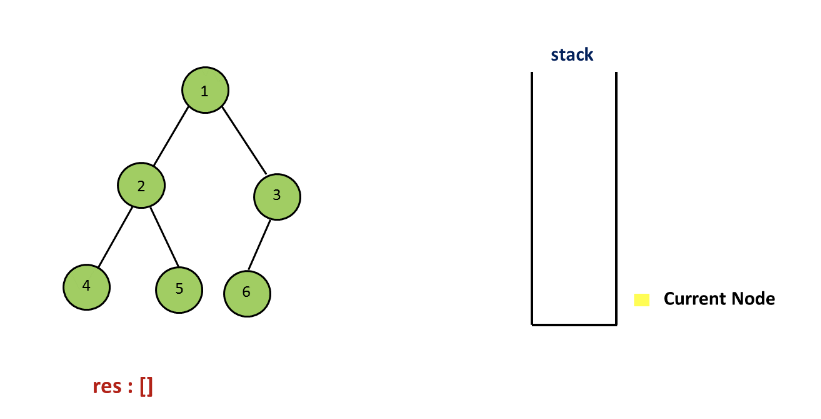

使用`ans`存储返回结果, 使用堆栈存储当前结果.

- 当节点为`1`时, 将其写入堆栈`stack=[1], cur_node = cur_node.left`
- 当节点为`2`时, 直接写入堆栈`stack=[1,2], cur_node = cur_node.left`
- 当节点为`4`时, 直接写入堆栈`stack=[1,2,4], cur_node = cur_node.left`
- 当当前节点为`None`时, 处理: `cur_node = stack.pop(), stack = [1,2], ans.append(cur_node.val), cur_node = cur_node.right, ans=[4]`
- 当当前节点为`None`时, 处理: `cur_node = stack.pop(), stack = [1], ans.append(cur_node.val), cur_node = cur_node.right, ans=[4,2]`
- 当节点为`5`时, 直接写入堆栈`stack=[1,5], cur_node = cur_node.left`
- 当当前节点为`None`时, 处理: `cur_node = stack.pop(), stack = [1], ans.append(cur_node.val), cur_node = cur_node.right, ans=[4,2,5]`
- 当当前节点为`None`时, 处理: `cur_node = stack.pop(), stack = [], ans.append(cur_node.val), cur_node = cur_node.right, ans=[4,2,5,1]`
- 当节点为`3`时, 直接写入堆栈`stack=[3]`
- 当节点为`6`时, 直接写入堆栈`stack=[3,6]`
- 当当前节点为`None`时, 处理: `cur_node = stack.pop(), stack = [3], ans.append(cur_node.val), cur_node = cur_node.right, ans=[4,2,5,1,6]`
- 当当前节点为`None`时, 处理: `cur_node = stack.pop(), stack = [], ans.append(cur_node.val), cur_node = cur_node.right, ans=[4,2,5,1,6,3]`

时间复杂度`O(n)`, 空间复杂度`O(n)`.

**方法3:莫里斯镜像法**

在本方法中, 我们需要使用一个新的数据结构--线索二叉树, 策略如下:
> 1. 初始化当前节点作为根节点
> 2. 当当前节点不为空时:
    > 2.1 如果当前节点没有左孩子节点:
        a. 增加当前的值
        b. 跳到右边, 也就是说: cur_node = cur_node.right
    > 2.2 否则:
        a. 在当前的左子树中, 将当前的有节点放到其最右边
        b. 跳到左边, 也就是说: cur_node = cur_node.left
 
举个例子:
```
          1
        /   \
       2     3
      / \   /
     4   5 6
```

首先, `1`是根节点, 因此, 将其初始化为`cur_node`, 它有左叶子节点`2`, 当前的左子树是:
```
         2
        / \
       4   5
```

而在这个子树中, 最右边的节点时`5`, 因此, 让`cur_node`作为`5`的右孩子, 将`cur_node=cur.left`, 树的形状如下:
```
         2
        / \
       4   5
            \
             1
              \
               3
              /
             6
```
对于当前节点`2`, 有叶子节点`4`, 使用如上所示相同的流程:

```
        4
         \
          2
           \
            5
             \
              1
               \
                3
               /
              6
```

然后增加`4`, 由于其没有左叶子节点, 然后一个个地增加`2,5,1`. 对于叶子节点`3`, 由于其有左叶子节点`6`, 进行上面相同的操作, 最后,中序遍历的结果为:`[4,2,5,1,6,3]`.

时间复杂度: `O(n)`. 最大的问题在于在二叉树中找所有节点的前驱节点的复杂度. 一般说来, 其时间复杂度为`O(nlog n)`, 因为找单个节点的前驱节点与树的高度相关. 但是事实上, 找到所有节点的前驱节点只需要`O(n)`的时间. 因为`n`个节点的二叉树有`n-1`条边, 每条边最多只会遍历最多两次, 一次是定位一个节点, 另一次是找前驱节点. 因此时间复杂度为`O(n)`.

空间复杂度: `O(n)`.

### 代码


In [1]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution(object):
    def inorderTraversal(self, root):
        """
        :type root: TreeNode
        :rtype: List[int]
        """
        ans = list()
        self.inorderRecursive(root, ans)
        return ans
        
    def inorderRecursive(self, root, ans):
        if root is not None:
            if root.left is not None:
                self.inorderRecursive(root.left, ans)
            ans.append(root.val)
            if root.right is not None:
                self.inorderRecursive(root.right, ans)
                
    def inorderTraversalIter(self, root):
        """
        :type root: TreeNode
        :rtype: List[int]
        """
        ans = list()
        stack = list()
        cur = root
        while cur is not None or len(stack) > 0:
            while cur is not None:
                stack.append(cur)
                cur = cur.left
            cur = stack[-1]
            stack = stack[:-1]
            ans.append(cur.val)
            cur = cur.right
        return ans
    
    def inorderTraversalMirror(self, root):
        """
        :type root: TreeNode
        :rtype: List[int]
        """
        ans = list()
        cur_node = root
        pre_node = None
        while cur_node is not None:
            if cur_node.left is None:
                ans.append(cur_node.val)
                cur_node = cur_node.right # move to right
            else:# has left tree
                pre = cur_node.left
                while pre.right is not None: # find rightmost mode
                    pre = pre.right
                pre.right = cur_node # put cur_node after the pre node
                tmp = cur_node.left # store the cur_node's left temparily
                cur_node.left = None # original cur_node left to be none, avoid infinite loops
                cur_node = tmp # move cur_node to the new root of the tree
        return ans
                

In [28]:
a = TreeNode(1)
b = TreeNode(2)
c = TreeNode(3)
a.right = b
b.left = c
s = Solution()
print s.inorderTraversalMirror(a)

[1, 3, 2]


## [96-Unique Binary Search Trees](https://leetcode.com/problems/unique-binary-search-trees/description/)

问题难度: &clubs; &clubs; &clubs;

### 问题描述

给定一个整数`n`, 能生成多少结构唯一`BST's` (`Binary Search Tree`, 二进制检索树)存储`1,...,n`的值?

**示例**
```
Input: 3
Output: 5

解析:对于n=3, 有 5 个唯一的 BST's:
   1         3     3      2      1
    \       /     /      / \      \
     3     2     1      1   3      2
    /     /       \                 \
   2     1         2                 3
```

### 解题思路

**方法1: 动态规划法**

这道题目可以使用动态规划法进行求解.

给定一个有序的序列`1..n`, 希望基于序列构造一个二进制检索树(`BST`), 我们可以穷举序列中的每个数字`i`, 将其作为根节点, 然后将子序列`1..i-1`放在根节点的左边, 将`i+1..n`放在根节点右边. 然后再从根节点迭代地构造子树. 通过上面的方法, 我们可以保证构造的`BST`都是唯一的, 因为它们的根节点是不一样的.

而且, 这个问题也可以在更小范围内解决, 而不用迭代(并且重复)解决子问题. 我们可以存储子问题的解决方案, 然后之后重用它们.

**算法**: 问题是为了计算唯一`BST`的数目, 为了解决这个问题, 我们需要定义两个函数:
- `G(n)`: 序列长度为`n`的唯一`BST`数目
- `F(i, n)`: `i`作为`BST`的根的唯一`BST`的数目(`1<=i<=n`)

正如我们看到的, `G(n)`正是我们想要求的函数.

接下来, 我们来看一下如何从`F(i,n)`规约到`G(n)`, 而最后怎么迭代引用到`G(n)`.

首先, 从两个函数的定义我们可以得到唯一`GST`数目应该等于所有以`i`为根的唯一`BST`的数目之和(`1<=i<=n`), 也就是说:

$G(n) = \sum_{i=1}^{n} F(i, n)$

特别地, 对于边界案例,当`n=1`时, 很显然:`G(0)=1, G(1)=1`.

给定一个序列`1..n`, 我们从序列中选出`i`作为根, 然后使用特定的根作为唯一`BST`的数目为`F(n,i)`, 为左边和右边子树的`BST`数目的笛卡尔积, 如下图所示:

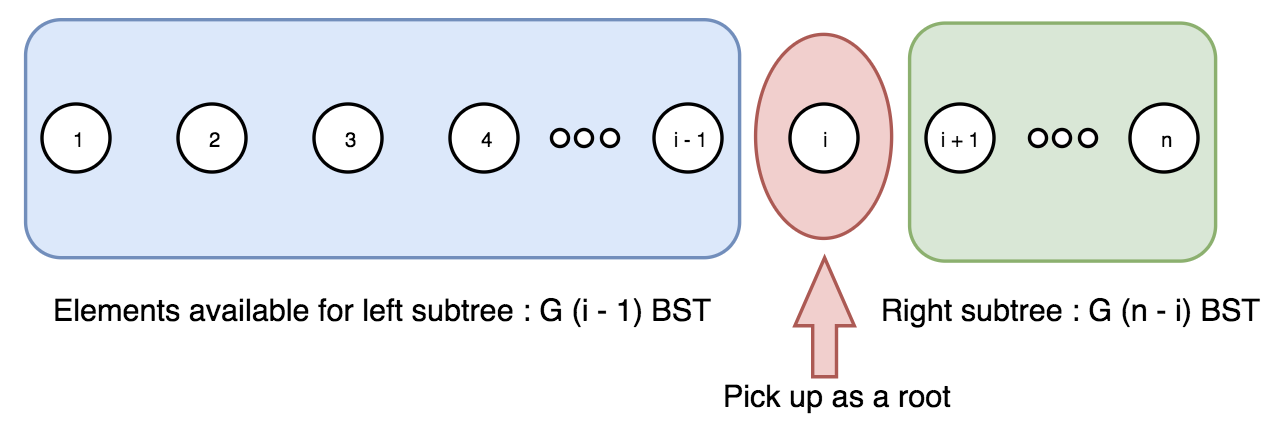

例如, `F(3,7)`表示将数字`3`作为根节点的唯一`BST`树的数目. 为了基于整个序列`[1,2,3,4,5,6,7]`使用`3`作为根节点的子树, 也就是说我们需要构造左子树为`[1,2]`而右子树为`[4,5,6,7]`, 再将它们组合起来(例如, 笛卡尔乘积). 比较讨巧的情况是, 我们将`[1,2]`中构造唯一`BST`树的个数定义为了`G(2)`, 而`[4,5,6,7]`构造唯一`BST`树的数目定义为`G(7-4+1)`. 对于`G(n)`, 不管序列的内容是什么,我们只需要考虑序列的长度, 因此, `F(3,7)=G(2) * G(4)`. 从示例中, 我们不难推导出:

$F(i, n) = G(i-1) * G(n-i)$

组合一下公式1和公式2, 我们可以得到`G(n)`的计算公式如下:

$G(n) = \sum_{i=1}^{n} G(i-1) * G(n-i)$

为了计算函数的结果, 我们从比较小的数字开始计算, 因为`G(n)`的值依赖于`G(0).. G(n-1)`的值.

时间复杂度分析: 算法的主要计算在`G(i)`上, 因此时间复杂度主要是迭代的次数中, $\sum_{i=2}^n \frac{(2+n)(n-1)}{2}$, 因此时间复杂度为`O(N^2)`, 空间复杂度为`O(N)`.

**算法2: 数学规约**

事实上, 按照上面的分析, 我们不难得到`G(n)`函数的结果为笛卡尔数`C(n)`,计算中更方便的方式是直接计算:

$C_0=1$

$C_{n+1}=\frac{2(2n+1)}{n+2}C_n$

基于上面的公式, 我们能够很快写出代码.

### 代码

In [13]:
class Solution(object):
    def numTrees(self, n):
        """
        :type n: int
        :rtype: int
        """
        G = [0] * (n+1)
        G[0], G[1] = 1, 1
        for i in range(2, n+1):
            for j in range(1, i+1):
                G[i] += G[j-1] * G[i-j]
        return G[n]
    
    def numTreesMath(self, n):
        C = 1
        for i in range(n):
            C = C* 2*(2*i+1)/ (i+2)
        return C

In [14]:
n = 3
s = Solution()
print s.numTreesMath(n)

5
